# Web scraping to gain company insights - British Airways

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

This project is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any possible insights.

## 1.0 - Scraping reviews

For this project, I will use requests and Beautiful Soup 4 libraries to parse the Airline Quality website and scrape the last 1000 BA reviews. The pandas library will save the scraped reviews to a dataframe along with other details of the review that can aid to understand customer's painpoints.

In [73]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd

In [74]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    parsed_content = BeautifulSoup(response.content, 'html.parser')

    for review_block in parsed_content.find_all("article", {"itemprop": "review"}):
        review_text_block = review_block.find("div", {"class": "text_content"})
        
        # To extract trip verification status
        verification_tag = review_text_block.find("em")
        if verification_tag:
            verification_status = verification_tag.get_text(strip=True)
            verification_tag.extract()  # This will remove the <em> tag from the review_text_block
        else:
            verification_status = "Not Verified"

        # Now, the "Trip Verified" or "Not Verified" part will be excluded from the review text.
        review_text = review_text_block.get_text(strip=True)

        # To extract the route
        potential_route_block = review_block.find("td", {"class": "review-rating-header route"})
        route = potential_route_block.find_next_sibling("td").get_text(strip=True) if potential_route_block else "Route not found"
        
        date_block = review_block.find("time", {"itemprop": "datePublished"})
        review_date = date_block['datetime'] if date_block else "Date not found"
            
        reviews.append({'reviews': review_text, 'date': review_date, 'route': route, 'verification': verification_status})
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [75]:
df = pd.DataFrame(reviews)
print(df)

                                               reviews        date  \
0    ✅|  Easy check in a T5. Galleries south and No...  2023-08-13   
1    |  Flight delayed by an hour, it happens, no b...  2023-08-12   
2    | The staff are very rude and not trained prop...  2023-08-11   
3    ✅|  Good domestic flight operated by BA Cityfl...  2023-08-08   
4    | Failed at all basic travel fundamentals: 1) ...  2023-08-08   
..                                                 ...         ...   
995  ✅|  Johannesburg to London. I tend to stay wit...  2018-10-17   
996  ✅|  Singapore to London Heathrow. It's my firs...  2018-10-17   
997  ✅|  London to Los Angeles. Booked this trip ei...  2018-10-15   
998  ✅|  Miami to London Heathrow. As with many oth...  2018-10-13   
999  | London Heathrow to Milan Malpensa. Worst air...  2018-10-07   

                                 route   verification  
0                      London to Miami  Trip Verified  
1                      London to Paris   Not Ve

In [76]:
df.to_csv("Cases/BA_reviews.csv")
df

,reviews,date,route,verification
0,✅| Easy check in a T5. Galleries south and No...,2023-08-13,London to Miami,Trip Verified
1,"| Flight delayed by an hour, it happens, no b...",2023-08-12,London to Paris,Not Verified
2,| The staff are very rude and not trained prop...,2023-08-11,London to Algiers,Not Verified
3,✅| Good domestic flight operated by BA Cityfl...,2023-08-08,Edinburgh to London City,Trip Verified
4,| Failed at all basic travel fundamentals: 1) ...,2023-08-08,London to Vienna,Not Verified
...,...,...,...,...
995,✅| Johannesburg to London. I tend to stay wit...,2018-10-17,Johannesburg to London,Trip Verified
996,✅| Singapore to London Heathrow. It's my firs...,2018-10-17,Singapore to London Heathrow,Trip Verified
997,✅| London to Los Angeles. Booked this trip ei...,2018-10-15,London to Los Angeles,Trip Verified
998,✅| Miami to London Heathrow. As with many oth...,2018-10-13,Miami to London Heathrow,Trip Verified


In [77]:
df.drop_duplicates()

,reviews,date,route,verification
0,✅| Easy check in a T5. Galleries south and No...,2023-08-13,London to Miami,Trip Verified
1,"| Flight delayed by an hour, it happens, no b...",2023-08-12,London to Paris,Not Verified
2,| The staff are very rude and not trained prop...,2023-08-11,London to Algiers,Not Verified
3,✅| Good domestic flight operated by BA Cityfl...,2023-08-08,Edinburgh to London City,Trip Verified
4,| Failed at all basic travel fundamentals: 1) ...,2023-08-08,London to Vienna,Not Verified
...,...,...,...,...
995,✅| Johannesburg to London. I tend to stay wit...,2018-10-17,Johannesburg to London,Trip Verified
996,✅| Singapore to London Heathrow. It's my firs...,2018-10-17,Singapore to London Heathrow,Trip Verified
997,✅| London to Los Angeles. Booked this trip ei...,2018-10-15,London to Los Angeles,Trip Verified
998,✅| Miami to London Heathrow. As with many oth...,2018-10-13,Miami to London Heathrow,Trip Verified


In [78]:
df["reviews"] = df["reviews"].str.lstrip("✅| ") 
df["reviews"] = df["reviews"].str.strip()
df

,reviews,date,route,verification
0,Easy check in a T5. Galleries south and North ...,2023-08-13,London to Miami,Trip Verified
1,"Flight delayed by an hour, it happens, no bigg...",2023-08-12,London to Paris,Not Verified
2,The staff are very rude and not trained proper...,2023-08-11,London to Algiers,Not Verified
3,Good domestic flight operated by BA Cityflyer....,2023-08-08,Edinburgh to London City,Trip Verified
4,Failed at all basic travel fundamentals: 1) Ou...,2023-08-08,London to Vienna,Not Verified
...,...,...,...,...
995,Johannesburg to London. I tend to stay with an...,2018-10-17,Johannesburg to London,Trip Verified
996,Singapore to London Heathrow. It's my first ti...,2018-10-17,Singapore to London Heathrow,Trip Verified
997,London to Los Angeles. Booked this trip eight ...,2018-10-15,London to Los Angeles,Trip Verified
998,Miami to London Heathrow. As with many others ...,2018-10-13,Miami to London Heathrow,Trip Verified


In [79]:
df['date'] = pd.to_datetime(df['date']) # To convert the "Route" from object to datetime type
df

,reviews,date,route,verification
0,Easy check in a T5. Galleries south and North ...,2023-08-13,London to Miami,Trip Verified
1,"Flight delayed by an hour, it happens, no bigg...",2023-08-12,London to Paris,Not Verified
2,The staff are very rude and not trained proper...,2023-08-11,London to Algiers,Not Verified
3,Good domestic flight operated by BA Cityflyer....,2023-08-08,Edinburgh to London City,Trip Verified
4,Failed at all basic travel fundamentals: 1) Ou...,2023-08-08,London to Vienna,Not Verified
...,...,...,...,...
995,Johannesburg to London. I tend to stay with an...,2018-10-17,Johannesburg to London,Trip Verified
996,Singapore to London Heathrow. It's my first ti...,2018-10-17,Singapore to London Heathrow,Trip Verified
997,London to Los Angeles. Booked this trip eight ...,2018-10-15,London to Los Angeles,Trip Verified
998,Miami to London Heathrow. As with many others ...,2018-10-13,Miami to London Heathrow,Trip Verified


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   reviews       1000 non-null   object        
 1   date          1000 non-null   datetime64[ns]
 2   route         1000 non-null   object        
 3   verification  1000 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 31.4+ KB


## 2.0 - Review Insights and Analysis

At this point, I have enough data to conduct my analysis on the customers. 
Data such as: Reviews, Review Date, Route, and Verification. 
Sentiment analysis, topic modelling, and word cloud will help provide some meaningful insights into these reviews.

### 2.1 - Sentiment Analysis

In [81]:
from textblob import TextBlob

def get_sentiment(text):
    # Creates a TextBlob object
    analysis = TextBlob(text)
    
    # Classifies the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews'].apply(get_sentiment) # This uses NLP to classify reviews into three brackets - positive, neutral, and negative. The observed  

In [82]:
df

,reviews,date,route,verification,sentiment
0,Easy check in a T5. Galleries south and North ...,2023-08-13,London to Miami,Trip Verified,positive
1,"Flight delayed by an hour, it happens, no bigg...",2023-08-12,London to Paris,Not Verified,positive
2,The staff are very rude and not trained proper...,2023-08-11,London to Algiers,Not Verified,negative
3,Good domestic flight operated by BA Cityflyer....,2023-08-08,Edinburgh to London City,Trip Verified,positive
4,Failed at all basic travel fundamentals: 1) Ou...,2023-08-08,London to Vienna,Not Verified,negative
...,...,...,...,...,...
995,Johannesburg to London. I tend to stay with an...,2018-10-17,Johannesburg to London,Trip Verified,positive
996,Singapore to London Heathrow. It's my first ti...,2018-10-17,Singapore to London Heathrow,Trip Verified,positive
997,London to Los Angeles. Booked this trip eight ...,2018-10-15,London to Los Angeles,Trip Verified,negative
998,Miami to London Heathrow. As with many others ...,2018-10-13,Miami to London Heathrow,Trip Verified,positive


In [83]:
df.to_csv("Cases/BA_reviewsVA.csv")

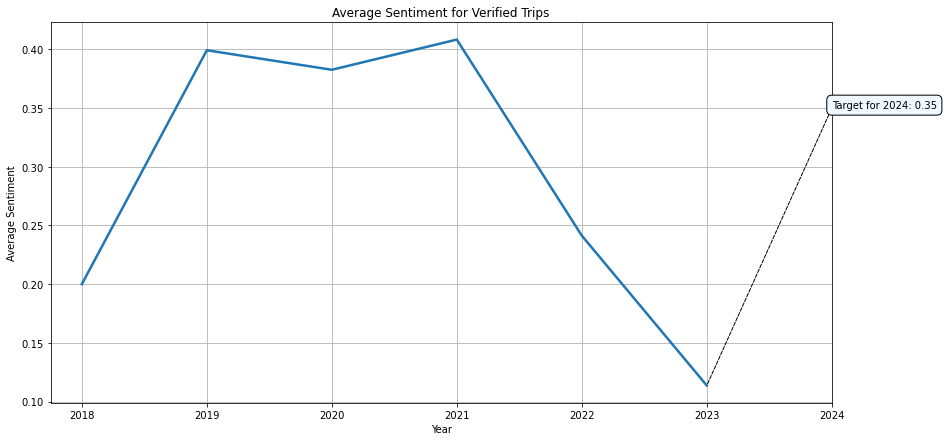

In [164]:
import matplotlib.pyplot as plt

# Extracts the year from the date
df['year'] = df['date'].dt.year 

# Filters the DataFrame for only verified trips
verified_df = df[df['verification'] == 'Trip Verified'] 

# Converts sentiments to numbers: -1 for negative, 0 for neutral, 1 for positive
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_value'] = df['sentiment'].map(sentiment_mapping)

# To group by year and calculate the average sentiment for verified reviews
average_sentiments_by_year_verified = verified_df.groupby('year')['sentiment_value'].mean()

# Plottings
plt.figure(figsize=(14,7))
ax = average_sentiments_by_year_verified.plot(linewidth=2.5)
plt.title('Average Sentiment for Verified Trips')
plt.ylabel('Average Sentiment')
plt.xlabel('Year')

# Ensure that the year 2024 is shown on x-axis
all_years = list(average_sentiments_by_year_verified.index)
all_years.append(2024)
plt.xticks(all_years)

# Get y-coordinate of 2023 data point
y_2023 = average_sentiments_by_year_verified.loc[2023]

# Draw a dotted line from 2023 point to KPI annotation
ax.annotate("", xy=(2024, 0.35), xytext=(2023, y_2023),
            arrowprops=dict(arrowstyle="-", linestyle='--'))

# To add a KPI text box
ax.text(2024, 0.35, 'Target for 2024: 0.35', bbox=dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="aliceblue"))

plt.grid(True)
plt.show()


### 2.2 - Topic Modelling

#### 2.2.1 - Positive Sentiments

In [147]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

# Add custom stopwords
CUSTOM_STOPWORDS = set(["flight", "ba", "british", "airways"])
STOPWORDS = STOPWORDS.union(CUSTOM_STOPWORDS)

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(WordNetLemmatizer().lemmatize(token, pos='v'))
    return result

# Filter the dataframe for positive sentiments
positive_reviews_df = df[df['sentiment'] == 'positive']

# Preprocess only the positive review comments
processed_positive_data = positive_reviews_df["reviews"].map(preprocess)

In [148]:
import nltk

In [149]:
dictionary = gensim.corpora.Dictionary(processed_positive_data)
corpus = [dictionary.doc2bow(text) for text in processed_positive_data]

In [150]:
lda_p_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=30, workers=2)

In [151]:
for idx, topic in lda_p_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.006*"class" + 0.005*"st" + 0.005*"okay" + 0.004*"offer" + 0.004*"quality" + 0.004*"bus" + 0.004*"mask" + 0.004*"plane" + 0.003*"friendly" + 0.003*"nice"

Topic: 1 
Words: 0.016*"book" + 0.015*"refund" + 0.013*"cancel" + 0.011*"fly" + 0.011*"pay" + 0.010*"service" + 0.010*"london" + 0.009*"seat" + 0.009*"change" + 0.008*"call"

Topic: 2 
Words: 0.012*"time" + 0.011*"london" + 0.011*"book" + 0.011*"bag" + 0.009*"fly" + 0.009*"delay" + 0.009*"service" + 0.008*"check" + 0.007*"customer" + 0.007*"travel"

Topic: 3 
Words: 0.026*"seat" + 0.017*"good" + 0.015*"service" + 0.014*"crew" + 0.014*"food" + 0.013*"cabin" + 0.010*"board" + 0.010*"class" + 0.010*"time" + 0.009*"business"

Topic: 4 
Words: 0.013*"time" + 0.011*"check" + 0.010*"staff" + 0.008*"tell" + 0.008*"service" + 0.008*"board" + 0.007*"hours" + 0.007*"ask" + 0.007*"airport" + 0.007*"london"



In [152]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [153]:
# lda_model is the trained LDA model and corpus and dictionary are the respective gensim objects
vis_data = gensimvis.prepare(lda_p_model, corpus, dictionary)
pyLDAvis.display(vis_data)

#### 2.2.2 - Negative Sentiments

In [154]:
# Add custom stopwords
CUSTOM_STOPWORDS = set(["flight", "ba", "british", "airways"])
STOPWORDS = STOPWORDS.union(CUSTOM_STOPWORDS)

def preprocess(text):
    result_n = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            result_n.append(WordNetLemmatizer().lemmatize(token, pos='v'))
    return result_n

# Filter the dataframe for negative sentiments
negative_reviews_df = df[df['sentiment'] == 'negative']

# Preprocess only the positive review comments
processed_negative_data = negative_reviews_df["reviews"].map(preprocess)

In [155]:
dictionary = gensim.corpora.Dictionary(processed_negative_data)
corpus = [dictionary.doc2bow(text) for text in processed_negative_data]

In [156]:
lda_n_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=30, workers=2)

In [157]:
for idx, topic in lda_n_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.014*"book" + 0.013*"hours" + 0.013*"customer" + 0.013*"service" + 0.012*"tell" + 0.010*"london" + 0.010*"airport" + 0.010*"delay" + 0.010*"bag" + 0.009*"try"

Topic: 1 
Words: 0.036*"seat" + 0.019*"class" + 0.015*"business" + 0.013*"service" + 0.012*"food" + 0.010*"london" + 0.009*"check" + 0.008*"pay" + 0.008*"offer" + 0.008*"cabin"

Topic: 2 
Words: 0.012*"cancel" + 0.012*"service" + 0.010*"book" + 0.009*"voucher" + 0.008*"hours" + 0.008*"time" + 0.007*"delay" + 0.006*"board" + 0.006*"london" + 0.006*"check"

Topic: 3 
Words: 0.014*"luggage" + 0.012*"staff" + 0.010*"london" + 0.010*"late" + 0.008*"delay" + 0.008*"arrive" + 0.007*"airport" + 0.007*"board" + 0.006*"miss" + 0.006*"send"

Topic: 4 
Words: 0.014*"seat" + 0.011*"time" + 0.010*"staff" + 0.008*"london" + 0.008*"airline" + 0.007*"crew" + 0.006*"fly" + 0.006*"food" + 0.006*"cabin" + 0.006*"service"



In [158]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [159]:
# lda_model is the trained LDA model and corpus and dictionary are the respective gensim objects
vis_data = gensimvis.prepare(lda_n_model, corpus, dictionary)
pyLDAvis.display(vis_data)

### 2.3 - Word Cloud

Taking a similar approach, I will begin by creating a word cloud of the most common words found within the reviews then I'll create additional word clouds for positive and negative sentiments. This will help paint a better picture of what is important to the customers.

#### 2.3.1 - General Sentiment

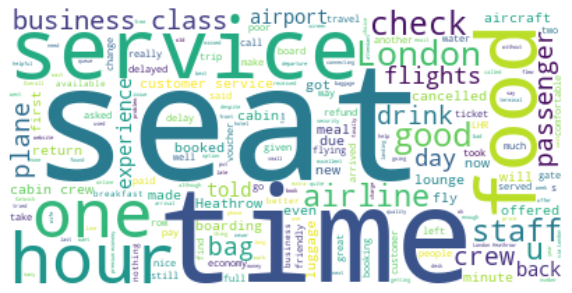

In [97]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(review for review in df['reviews'])

# Optionally, add any additional stopwords
stopwords = set(STOPWORDS)
# Example: stopwords.update(["word1", "word2"])
stopwords.update(["flight", "ba", "british", "airways"])
# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2.3.2 - Positive Sentiments

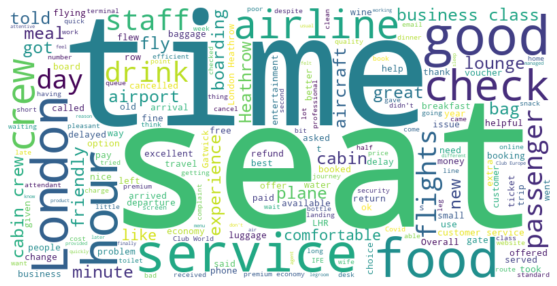

In [161]:
# Filter out positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['reviews']

# Concatenate the reviews to a single string
text = ' '.join(review for review in positive_reviews)

# Generate a word cloud image
stopwords = set(STOPWORDS)
# Example: stopwords.update(["word1", "word2"])
stopwords.update(["flight", "ba", "british", "airways"])
# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### 2.3.3 - Negative Sentiments

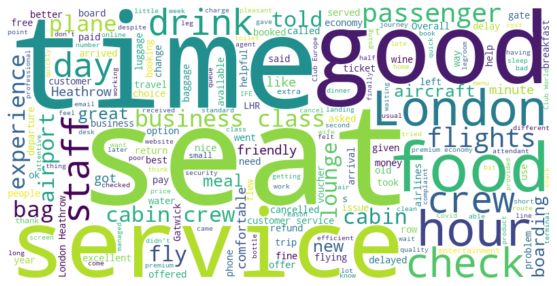

In [163]:
# Filter out negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['reviews']

# Concatenate the reviews to a single string
text = ' '.join(review for review in positive_reviews)

# Generate a word cloud image
stopwords = set(STOPWORDS)
# Example: stopwords.update(["word1", "word2"])
stopwords.update(["flight", "ba", "british", "airways", "u", "one", "airline"])
# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


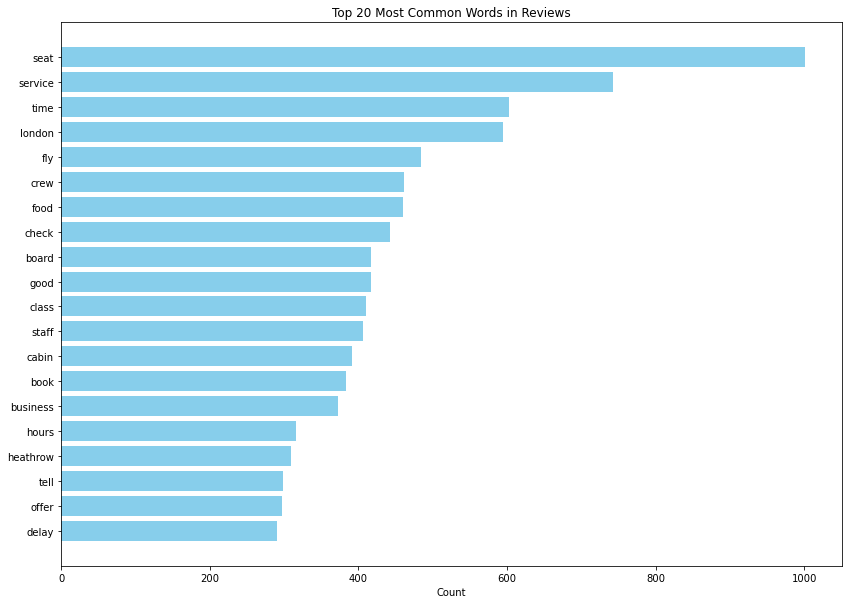

In [174]:
from collections import Counter

def preprocess(text):
    result_c = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            result_c.append(WordNetLemmatizer().lemmatize(token, pos='v'))
    return result_c

# Preprocess the review comments for all rows in the DataFrame
processed_data = df["reviews"].map(preprocess)

# Flatten to get all tokens
all_tokens = [token for review in processed_data for token in review]

# Count occurrences
token_count = Counter(all_tokens)

# Get the top N most common tokens
top_N = 20
most_common_tokens = token_count.most_common(top_N)

# Split the tokens and their counts
tokens, counts = zip(*most_common_tokens)

# Plotting
plt.figure(figsize=(14,10))
plt.barh(tokens, counts, color='skyblue')
plt.xlabel('Count')
plt.title(f'Top {top_N} Most Common Words in Reviews')
plt.gca().invert_yaxis() 
plt.show()


In [166]:
processed_data

0      [easy, check, galleries, south, north, lounge,...
1      [delay, hour, happen, biggie, change, gate, ai...
3      [good, domestic, operate, cityflyer, grind, se...
5      [lose, baggage, simple, situation, weeks, care...
8      [fantastic, today, cabin, crew, seat, zone, be...
                             ...                        
990    [muc, lhr, plus, grind, cabin, crew, friendly,...
991    [manchester, philadelphia, london, man, lhr, t...
995    [johannesburg, london, tend, stay, airline, fr...
996    [singapore, london, heathrow, time, travel, se...
998    [miami, london, heathrow, post, review, site, ...
Name: reviews, Length: 650, dtype: object